In [4]:
from default_varqite_gibbs import qite_gibbs_state_builder, classical_gibbs_distr
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def create_hamiltonian_lattice(num_sites: int) -> SparsePauliOp:
    """Creates an Ising Hamiltonian on a lattice."""
    j_const = 0.1
    g_const = -1.0

    zz_op = ["I" * i + "ZZ" + "I" * (num_sites - i - 2) for i in range(num_sites - 1)]
    x_op = ["I" * i + "X" + "I" * (num_sites - i - 1) for i in range(num_sites)]
    return SparsePauliOp(zz_op) * j_const + SparsePauliOp(x_op) * g_const

hamiltonian = create_hamiltonian_lattice(4)
beta = 5

In [23]:
expected_result = classical_gibbs_distr(hamiltonian = hamiltonian, beta = beta)
print(expected_result)
qite_probs = []
for steps in [3,10]:
    start = time.time()
    result = qite_gibbs_state_builder(hamiltonian = hamiltonian, beta = beta, steps=5*steps,depth =3,  seed=0)
    finish = time.time()
    qite_probs.append(result["qite_state_probs"])
    print(steps,f"Time:{finish-start:.1f}",qite_probs[-1],"Error:",np.linalg.norm(expected_result - qite_probs[-1]))


[0.05372036+0.j 0.05923124+0.j 0.06545532+0.j 0.05908218+0.j
 0.06545532+0.j 0.07253409+0.j 0.06529026+0.j 0.05923124+0.j
 0.05923124+0.j 0.06529026+0.j 0.07253409+0.j 0.06545532+0.j
 0.05908218+0.j 0.06545532+0.j 0.05923124+0.j 0.05372036+0.j]
3 Time:390.6 [0.06246189 0.06246189 0.06246189 0.06246189 0.06253811 0.06253811
 0.06253811 0.06253811 0.06253811 0.06253811 0.06253811 0.06253811
 0.06246189 0.06246189 0.06246189 0.06246189] Error: 0.021641345700108817
10 Time:1224.3 [0.0624656 0.0624656 0.0624656 0.0624656 0.0625344 0.0625344 0.0625344
 0.0625344 0.0625344 0.0625344 0.0625344 0.0625344 0.0624656 0.0624656
 0.0624656 0.0624656] Error: 0.021649811236213273


(0.0, 1.0)

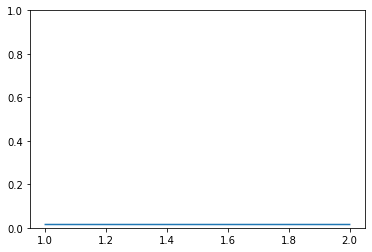

In [21]:
plt.plot(list(range(1,1+len(qite_probs))),[np.linalg.norm(expected_result - q) for q in qite_probs])
plt.ylim(0,1)

In [ ]:
expected_result = classical_gibbs_distr(hamiltonian = hamiltonian, beta = beta)
print(expected_result)
qite_probs = []
for depth in range(1,5):
    start = time.time()
    result = qite_gibbs_state_builder(hamiltonian = hamiltonian, beta = beta, steps=steps,depth =depth,  seed=0)
    finish = time.time()
    qite_probs.append(result["qite_state_probs"])
    print(depth,f"Time:{finish-start:.1f}",qite_probs[-1],"Error:",np.linalg.norm(expected_result - qite_probs[-1]))

[2.12417713e-18+0.j 5.00000000e-01+0.j 5.00000000e-01+0.j
 2.12417713e-18+0.j]
1 Time:5.5 [0.39846574 0.10153426 0.10153426 0.39846574] Error: 0.7969314731897099
2 Time:13.7 [0.39846574 0.10153426 0.10153426 0.39846574] Error: 0.7969314731939539
3 Time:28.1 [0.39846574 0.10153426 0.10153426 0.39846574] Error: 0.7969314731822381
4 Time:50.7 [0.39846574 0.10153426 0.10153426 0.39846574] Error: 0.7969314731941657


(0.0, 1.0)

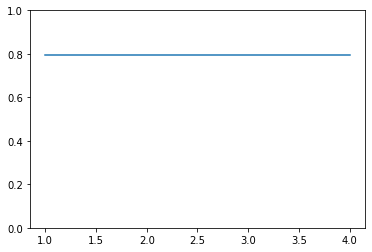

In [ ]:
plt.plot(list(range(1,1+len(qite_probs))),[np.linalg.norm(expected_result - q) for q in qite_probs])
plt.ylim(0,1)